In [1]:
import torch

In [2]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

PATH = '/content/drive/MyDrive/name_gender_dataset.csv'
DATASET = pd.read_csv(PATH)

Mounted at /content/drive


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import torch

import random

torch.manual_seed(0)
np.random.seed(0)
random.seed(0)

# **Read and Clean the Data**

In [5]:
DATASET.head()

,Name,Gender,Count,Probability
0,James,M,5304407,0.014517
1,John,M,5260831,0.014398
2,Robert,M,4970386,0.013603
3,Michael,M,4579950,0.012534
4,William,M,4226608,0.011567


In [6]:
DATASET.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147269 entries, 0 to 147268
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Name         147269 non-null  object 
 1   Gender       147269 non-null  object 
 2   Count        147269 non-null  int64  
 3   Probability  147269 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.5+ MB


In [7]:
DATASET.describe()

,Count,Probability
count,1.472690e+05,1.472690e+05
mean,2.481161e+03,6.790295e-06
std,4.645472e+04,1.271345e-04
min,1.000000e+00,2.736740e-09
25%,5.000000e+00,1.368370e-08
50%,1.700000e+01,4.652460e-08
75%,1.320000e+02,3.612500e-07
max,5.304407e+06,1.451679e-02


In [8]:
DATASET.value_counts

<bound method DataFrame.value_counts of            Name Gender    Count   Probability
0         James      M  5304407  1.451679e-02
1          John      M  5260831  1.439753e-02
2        Robert      M  4970386  1.360266e-02
3       Michael      M  4579950  1.253414e-02
4       William      M  4226608  1.156713e-02
...         ...    ...      ...           ...
147264   Zylenn      M        1  2.736740e-09
147265   Zymeon      M        1  2.736740e-09
147266   Zyndel      M        1  2.736740e-09
147267   Zyshan      M        1  2.736740e-09
147268    Zyton      M        1  2.736740e-09

[147269 rows x 4 columns]>

In [9]:
SRC = DATASET.Name.values.tolist()       
TRG = DATASET.Gender.values.tolist()       

In [10]:
# print(SRC)

In [11]:
from sklearn.model_selection import train_test_split

TRAIN_DATA, TEST_DATA, TRAIN_LABEL, TEST_LABEL = train_test_split(SRC, TRG, test_size=0.2, random_state=42, shuffle=True)
TRAIN_DATA, VALID_DATA, TRAIN_LABEL, VALID_LABEL = train_test_split(TRAIN_DATA, TRAIN_LABEL, test_size=0.1, random_state=42, shuffle=True)

In [12]:
# print(TRAIN_DATA)

# **Create Vocabulary of the characters**

In [13]:
'''convert to the char '''
char_set = set()

for name in TRAIN_DATA:
    for ch in list(name):
        char_set.add(ch.lower())

print(char_set)

{'e', 'g', 'n', '…', ')', ',', '0', 'p', '?', 'c', 'w', ';', 'o', 'q', 'y', '9', '(', 'f', '/', '1', 'l', 'x', '¡', '7', "'", 'u', 'b', 'k', '5', 'm', 'a', '@', '[', 'z', '-', 'v', 't', 'à', 's', 'i', 'r', 'h', '8', 'j', '.', 'œ', 'd', 'ö'}


In [14]:
CHAR2INDEX = {char: indx + 2 for indx, char in enumerate(char_set)}
CHAR2INDEX['<UNK>'] = 1 # for OOV
CHAR2INDEX['<PAD>'] = 0 # for PADDING


INDEX2CHAR = {indx + 2: char for indx, char in enumerate(char_set)}
INDEX2CHAR[1] = '<UNK>' # for OOV
INDEX2CHAR[0] = '<PAD>' # for PADDING

In [15]:
print(CHAR2INDEX)
print(INDEX2CHAR)

{'e': 2, 'g': 3, 'n': 4, '…': 5, ')': 6, ',': 7, '0': 8, 'p': 9, '?': 10, 'c': 11, 'w': 12, ';': 13, 'o': 14, 'q': 15, 'y': 16, '9': 17, '(': 18, 'f': 19, '/': 20, '1': 21, 'l': 22, 'x': 23, '¡': 24, '7': 25, "'": 26, 'u': 27, 'b': 28, 'k': 29, '5': 30, 'm': 31, 'a': 32, '@': 33, '[': 34, 'z': 35, '-': 36, 'v': 37, 't': 38, 'à': 39, 's': 40, 'i': 41, 'r': 42, 'h': 43, '8': 44, 'j': 45, '.': 46, 'œ': 47, 'd': 48, 'ö': 49, '<UNK>': 1, '<PAD>': 0}
{2: 'e', 3: 'g', 4: 'n', 5: '…', 6: ')', 7: ',', 8: '0', 9: 'p', 10: '?', 11: 'c', 12: 'w', 13: ';', 14: 'o', 15: 'q', 16: 'y', 17: '9', 18: '(', 19: 'f', 20: '/', 21: '1', 22: 'l', 23: 'x', 24: '¡', 25: '7', 26: "'", 27: 'u', 28: 'b', 29: 'k', 30: '5', 31: 'm', 32: 'a', 33: '@', 34: '[', 35: 'z', 36: '-', 37: 'v', 38: 't', 39: 'à', 40: 's', 41: 'i', 42: 'r', 43: 'h', 44: '8', 45: 'j', 46: '.', 47: 'œ', 48: 'd', 49: 'ö', 1: '<UNK>', 0: '<PAD>'}


In [16]:
LABEL2INDEX = {'M':0,'F':1}
INDEX2LABEL = {0:'M',1:'F'}

In [17]:
print(LABEL2INDEX)
print(INDEX2LABEL)

{'M': 0, 'F': 1}
{0: 'M', 1: 'F'}


In [18]:
# set device to CUDA if available, else to CPU
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device:', DEVICE)

Device: cuda


# **Create a Dataset class**

In [19]:
from torch.utils.data import Dataset, DataLoader

class DATASET(Dataset):
  def __init__(self, names, genders,mapping_data, mapping_label):
    self.names= names
    self.names = [indexing(name,mapping_data) for name in names]
    self.genders = genders
    self.genders = [mapping_label[gender] for gender in self.genders]
    self.length = len(self.names)
    
  def __getitem__(self, item):
    return self.names[item], self.genders[item]
  def __len__(self):
    return self.length

In [20]:
def indexing(name,mapping_data):
  return [mapping_data[char.lower()] if char.lower() in mapping_data else mapping_data['<UNK>'] for char in name]

In [21]:
DATASET_TRAIN = DATASET(names=TRAIN_DATA, genders=TRAIN_LABEL, mapping_data=CHAR2INDEX,
                              mapping_label=LABEL2INDEX)
DATASET_VALID = DATASET(names=VALID_DATA, genders=VALID_LABEL, mapping_data=CHAR2INDEX,
                              mapping_label=LABEL2INDEX)
DATASET_TEST = DATASET(names=TEST_DATA, genders=TEST_LABEL, mapping_data=CHAR2INDEX,
                              mapping_label=LABEL2INDEX)

In [22]:
# (DATASET_TRAIN.names)

In [23]:
# print(DATASET_TRAIN.genders)

In [24]:
from torch import nn
from torch.nn.utils.rnn import pad_sequence

def pad_collate(batch):
  (data, label) = zip(*batch)
  data = [torch.tensor(i, dtype=torch.int) for i in data]
  label = torch.tensor(label, dtype=torch.float)

  data = pad_sequence(data, batch_first=True, padding_value=0)
  data = torch.tensor(data, dtype=torch.int)

  return data, label

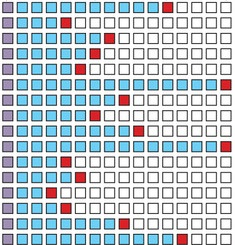

In [25]:
""" Hyper-Parameter Definition """

BATCH_SIZE = 50
EPOCH_SIZE = 30

INPUT_SIZE = len(CHAR2INDEX)
HIDDEN_SIZE = 256
OUTPUT_DIM = 1
N_LAYERS = 1
LEARNING_RATE = 0.001

'''
Data Loader
'''
DATALOADER_TRAIN = DataLoader(dataset=DATASET_TRAIN,
                              batch_size=BATCH_SIZE,
                              num_workers=4,
                              collate_fn=pad_collate)

DATALOADER_TEST = DataLoader(dataset=DATASET_TEST,
                              batch_size=BATCH_SIZE,
                              num_workers=4,
                              collate_fn=pad_collate)

DATALOADER_VALID = DataLoader(dataset=DATASET_VALID,
                              batch_size=BATCH_SIZE,
                              num_workers=4,
                              collate_fn=pad_collate)

In [26]:
# iter(DATALOADER_TRAIN).next()


# Create model

In [27]:
from torch.nn.functional import sigmoid

class MODEL_Gender(nn.Module):
  def __init__(self, input_size, hidden_size, output_dim, n_layers, batch_size):
    super(MODEL_Gender,self).__init__()
    self.input_size=input_size
    self.hidden_size=hidden_size
    self.output_dim=output_dim
    self.n_layers=n_layers
    self.batch_size=batch_size

    self.embedding= nn.Embedding(input_size,self.hidden_size)

    self.lstm=nn.LSTM(self.hidden_size, 
                      self.hidden_size, 
                      self.n_layers
                      )
    
    self.fully_connected = nn.Linear(hidden_size,
                                     output_dim)

  
  def forward(self, input):
      # input: [batch size, sent len]  --> [sent len, batch size]
      # print(input.size(0))

      # print(input.T)
      self.sent_len=input.size(0)
      input=input.T

      # Embedding: [sent len, batch size] --> [sent len, batch size, hidden size]
      embedded = self.embedding(input)
      self.batch_size = embedded.size(1)
      # output = [sent len, batch size, hidden size]
      # hidden =  [Direction * num_layers, Batch size, hidden size]
      output, (hidden, cell) = self.lstm(embedded)

      fc_output = self.fully_connected(hidden[-1, :])
      fc_output = fc_output.view(-1).to(DEVICE)

      return sigmoid(fc_output)


In [28]:
""" Step 1: Model class in PyTorch way """
MODEL =  MODEL_Gender(
              input_size=INPUT_SIZE,
              hidden_size=HIDDEN_SIZE,
              output_dim=OUTPUT_DIM, 
              n_layers=N_LAYERS,
              batch_size=BATCH_SIZE
              )
MODEL.to(DEVICE)

MODEL_Gender(
  (embedding): Embedding(50, 256)
  (lstm): LSTM(256, 256)
  (fully_connected): Linear(in_features=256, out_features=1, bias=True)
)

In [29]:
MODEL.forward

<bound method MODEL_Gender.forward of MODEL_Gender(
  (embedding): Embedding(50, 256)
  (lstm): LSTM(256, 256)
  (fully_connected): Linear(in_features=256, out_features=1, bias=True)
)>

In [30]:
# !git clone --quiet https://github.com/tensorflow/models.git

In [31]:
# !apt-get install -qq protobuf-compiler python-tk

# !pip install -q Cython contextlib2 pillow lxml matplotlib PyDrive

# !pip install -q pycocotools

# !pip install tensorflow-object-detection-api

# !pip install tf_slim tensorflow_io   # added

# %cd /content/models/research   # modified
# !protoc object_detection/protos/*.proto --python_out=.

# import os
# os.environ['PYTHONPATH'] += ':/content/models/research/:/content/models/research/slim/:/content/models/'   # modified

# !python object_detection/builders/model_builder_test.py

# **Train the model**

In [32]:
def binary_acc(y_pred, y_test):
    y_pred = torch.tensor(y_pred)
    y_test = torch.tensor(y_test)

    correct_results_sum = (y_pred == y_test).sum().float()
    acc = correct_results_sum / y_test.shape[0]
    acc = acc
    return acc

In [33]:
def save_checkpoint(save_path, model, optimizer, valid_loss):
    if not save_path:
        return

    state_dict = {'model_state_dict': model.state_dict(),
                  'optimizer_state_dict': optimizer.state_dict(),
                  'valid_loss': valid_loss}

    torch.save(state_dict, save_path)
    print(f'Model saved to ==> {save_path}')




def load_checkpoint(load_path, model, optimizer):
    if not load_path:
        return

    state_dict = torch.load(load_path, map_location=DEVICE)
    print(f'Model loaded from <== {load_path}')

    model.load_state_dict(state_dict['model_state_dict'])
    optimizer.load_state_dict(state_dict['optimizer_state_dict'])

    return state_dict['valid_loss']

In [34]:
# MODEL.forward()

In [35]:
from tqdm import tqdm

""" Step 2: Construct loss and optimizer  and train the Model"""
CRITERION = torch.nn.BCELoss().to(DEVICE)
OPTIMIZER = torch.optim.SGD(MODEL.parameters(), LEARNING_RATE)
PATH_MODEL = '/content/drive/MyDrive/best_model.pt'

plot_loss_train =[]
plot_loss_valid =[]

best_accuracy = 0.0
CHANGE_VALID_ACCURACY = 0

for epoch in tqdm(range(EPOCH_SIZE)):
    print(f"## Epoch {epoch} is running ...")
    MODEL.train()
    loss_train_BATCH = []

    for BATCH_INDEX, BATCH in enumerate(DATALOADER_TRAIN):
        DATA_BATCH, LABEL_BATCH = BATCH
        # print(type(DATA_BATCH))
        DATA_BATCH = DATA_BATCH.to(DEVICE)
        LABEL_BATCH = LABEL_BATCH.to(DEVICE)
        out = MODEL(DATA_BATCH)

        LOSS = CRITERION(out, LABEL_BATCH)
        loss_train_BATCH.append(LOSS.cpu().detach().numpy())
        
        LOSS.backward()
        OPTIMIZER.step()

        OPTIMIZER.zero_grad()
    plot_loss_train.append(sum(loss_train_BATCH) / len(loss_train_BATCH))
        
    MODEL.eval()

    with torch.no_grad():
            loss_valid_BATCH = []

            valid_TRUE_LABLES = []
            valid_predicted_LABLES = []

            for BATCH in DATALOADER_VALID:
                DATA_BATCH, LABEL_BATCH = BATCH
                DATA_BATCH = DATA_BATCH.to(DEVICE)
                LABEL_BATCH = LABEL_BATCH.to(DEVICE)

                OUTPUT = MODEL(DATA_BATCH)
                LOSS = CRITERION(OUTPUT, LABEL_BATCH)
                loss_valid_BATCH.append(LOSS.cpu().detach().numpy())

                valid_TRUE_LABLES.extend(LABEL_BATCH.tolist())
                valid_predicted_LABLES.extend(torch.round(OUTPUT).tolist())

            ACCURACY = binary_acc(y_pred=valid_predicted_LABLES, y_test=valid_TRUE_LABLES)
            print(f'Accuracy on Validation Set: {ACCURACY :.2f}%')

            if ACCURACY > best_accuracy:
                best_accuracy = ACCURACY
                save_checkpoint(save_path=PATH_MODEL, model=MODEL,
                                optimizer=OPTIMIZER, valid_loss=plot_loss_valid)
            elif ACCURACY == best_accuracy:
                CHANGE_VALID_ACCURACY += 1

            if CHANGE_VALID_ACCURACY == 3:
                print(f'Change Valid Accuracy: <<True>> --> Early Stopped.')
                break

            plot_loss_valid.append(sum(loss_valid_BATCH) / len(loss_valid_BATCH))

    print(f'The best validation accuracy is=> {best_accuracy :.2f}%')
    print(f"Training == done.")

  0%|          | 0/30 [00:00<?, ?it/s]

## Epoch 0 is running ...
Accuracy on Validation Set: 0.61%


  3%|▎         | 1/30 [00:11<05:26, 11.26s/it]

Model saved to ==> /content/drive/MyDrive/best_model.pt
The best validation accuracy is=> 0.61%
Training == done.
## Epoch 1 is running ...


  7%|▋         | 2/30 [00:19<04:32,  9.74s/it]

Accuracy on Validation Set: 0.61%
The best validation accuracy is=> 0.61%
Training == done.
## Epoch 2 is running ...


 10%|█         | 3/30 [00:28<04:10,  9.28s/it]

Accuracy on Validation Set: 0.61%
The best validation accuracy is=> 0.61%
Training == done.
## Epoch 3 is running ...


 13%|█▎        | 4/30 [00:37<03:55,  9.07s/it]

Accuracy on Validation Set: 0.61%
The best validation accuracy is=> 0.61%
Training == done.
## Epoch 4 is running ...


 17%|█▋        | 5/30 [00:47<03:52,  9.32s/it]

Accuracy on Validation Set: 0.61%
The best validation accuracy is=> 0.61%
Training == done.
## Epoch 5 is running ...


 20%|██        | 6/30 [00:56<03:42,  9.28s/it]

Accuracy on Validation Set: 0.61%
The best validation accuracy is=> 0.61%
Training == done.
## Epoch 6 is running ...


 23%|██▎       | 7/30 [01:05<03:34,  9.34s/it]

Accuracy on Validation Set: 0.64%
Model saved to ==> /content/drive/MyDrive/best_model.pt
The best validation accuracy is=> 0.64%
Training == done.
## Epoch 7 is running ...


 27%|██▋       | 8/30 [01:14<03:21,  9.15s/it]

Accuracy on Validation Set: 0.70%
Model saved to ==> /content/drive/MyDrive/best_model.pt
The best validation accuracy is=> 0.70%
Training == done.
## Epoch 8 is running ...


 30%|███       | 9/30 [01:23<03:10,  9.07s/it]

Accuracy on Validation Set: 0.72%
Model saved to ==> /content/drive/MyDrive/best_model.pt
The best validation accuracy is=> 0.72%
Training == done.
## Epoch 9 is running ...


 33%|███▎      | 10/30 [01:32<02:59,  8.97s/it]

Accuracy on Validation Set: 0.73%
Model saved to ==> /content/drive/MyDrive/best_model.pt
The best validation accuracy is=> 0.73%
Training == done.
## Epoch 10 is running ...


 37%|███▋      | 11/30 [01:40<02:48,  8.88s/it]

Accuracy on Validation Set: 0.73%
Model saved to ==> /content/drive/MyDrive/best_model.pt
The best validation accuracy is=> 0.73%
Training == done.
## Epoch 11 is running ...


 40%|████      | 12/30 [01:49<02:38,  8.81s/it]

Accuracy on Validation Set: 0.74%
Model saved to ==> /content/drive/MyDrive/best_model.pt
The best validation accuracy is=> 0.74%
Training == done.
## Epoch 12 is running ...


 43%|████▎     | 13/30 [01:59<02:35,  9.16s/it]

Accuracy on Validation Set: 0.75%
Model saved to ==> /content/drive/MyDrive/best_model.pt
The best validation accuracy is=> 0.75%
Training == done.
## Epoch 13 is running ...


 47%|████▋     | 14/30 [02:08<02:24,  9.03s/it]

Accuracy on Validation Set: 0.75%
Model saved to ==> /content/drive/MyDrive/best_model.pt
The best validation accuracy is=> 0.75%
Training == done.
## Epoch 14 is running ...


 50%|█████     | 15/30 [02:17<02:14,  8.96s/it]

Accuracy on Validation Set: 0.76%
Model saved to ==> /content/drive/MyDrive/best_model.pt
The best validation accuracy is=> 0.76%
Training == done.
## Epoch 15 is running ...


 53%|█████▎    | 16/30 [02:25<02:05,  8.95s/it]

Accuracy on Validation Set: 0.76%
Model saved to ==> /content/drive/MyDrive/best_model.pt
The best validation accuracy is=> 0.76%
Training == done.
## Epoch 16 is running ...


 57%|█████▋    | 17/30 [02:34<01:55,  8.88s/it]

Accuracy on Validation Set: 0.76%
Model saved to ==> /content/drive/MyDrive/best_model.pt
The best validation accuracy is=> 0.76%
Training == done.
## Epoch 17 is running ...


 60%|██████    | 18/30 [02:43<01:47,  8.94s/it]

Accuracy on Validation Set: 0.76%
Model saved to ==> /content/drive/MyDrive/best_model.pt
The best validation accuracy is=> 0.76%
Training == done.
## Epoch 18 is running ...


 63%|██████▎   | 19/30 [02:53<01:42,  9.30s/it]

Accuracy on Validation Set: 0.76%
Model saved to ==> /content/drive/MyDrive/best_model.pt
The best validation accuracy is=> 0.76%
Training == done.
## Epoch 19 is running ...


 67%|██████▋   | 20/30 [03:02<01:31,  9.14s/it]

Accuracy on Validation Set: 0.76%
Model saved to ==> /content/drive/MyDrive/best_model.pt
The best validation accuracy is=> 0.76%
Training == done.
## Epoch 20 is running ...


 70%|███████   | 21/30 [03:11<01:20,  9.00s/it]

Accuracy on Validation Set: 0.77%
Model saved to ==> /content/drive/MyDrive/best_model.pt
The best validation accuracy is=> 0.77%
Training == done.
## Epoch 21 is running ...


 73%|███████▎  | 22/30 [03:19<01:11,  8.90s/it]

Accuracy on Validation Set: 0.77%
Model saved to ==> /content/drive/MyDrive/best_model.pt
The best validation accuracy is=> 0.77%
Training == done.
## Epoch 22 is running ...


 77%|███████▋  | 23/30 [03:28<01:02,  8.89s/it]

Accuracy on Validation Set: 0.77%
Model saved to ==> /content/drive/MyDrive/best_model.pt
The best validation accuracy is=> 0.77%
Training == done.
## Epoch 23 is running ...


 80%|████████  | 24/30 [03:37<00:52,  8.81s/it]

Accuracy on Validation Set: 0.77%
Model saved to ==> /content/drive/MyDrive/best_model.pt
The best validation accuracy is=> 0.77%
Training == done.
## Epoch 24 is running ...


 83%|████████▎ | 25/30 [03:47<00:45,  9.11s/it]

Accuracy on Validation Set: 0.77%
Model saved to ==> /content/drive/MyDrive/best_model.pt
The best validation accuracy is=> 0.77%
Training == done.
## Epoch 25 is running ...


 87%|████████▋ | 26/30 [03:56<00:36,  9.03s/it]

Accuracy on Validation Set: 0.77%
Model saved to ==> /content/drive/MyDrive/best_model.pt
The best validation accuracy is=> 0.77%
Training == done.
## Epoch 26 is running ...


 90%|█████████ | 27/30 [04:04<00:26,  8.97s/it]

Accuracy on Validation Set: 0.77%
The best validation accuracy is=> 0.77%
Training == done.
## Epoch 27 is running ...


 93%|█████████▎| 28/30 [04:13<00:17,  8.95s/it]

Accuracy on Validation Set: 0.77%
Model saved to ==> /content/drive/MyDrive/best_model.pt
The best validation accuracy is=> 0.77%
Training == done.
## Epoch 28 is running ...


 97%|█████████▋| 29/30 [04:24<00:09,  9.34s/it]

Accuracy on Validation Set: 0.77%
Model saved to ==> /content/drive/MyDrive/best_model.pt
The best validation accuracy is=> 0.77%
Training == done.
## Epoch 29 is running ...


100%|██████████| 30/30 [04:33<00:00,  9.10s/it]

Accuracy on Validation Set: 0.77%
Model saved to ==> /content/drive/MyDrive/best_model.pt
The best validation accuracy is=> 0.77%
Training == done.


# **Analyze the results**

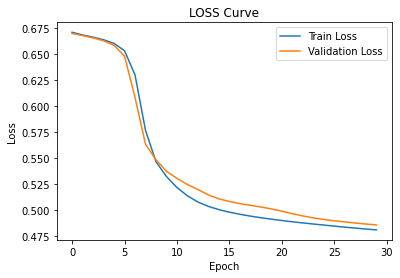

<Figure size 432x288 with 0 Axes>

In [36]:
from matplotlib import pyplot as plt

plt.title("LOSS Curve")

plt.plot(plot_loss_train, label='Train Loss')
plt.plot(plot_loss_valid, label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()
plt.savefig('/content/drive/MyDrive/gender_detection_loss_curve.png')

In [37]:
from google.colab import files

files.download('/content/drive/MyDrive/gender_detection_loss_curve.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
name = 'helia'
name_tensor = torch.tensor([indexing(name, CHAR2INDEX)], dtype=torch.int).to(DEVICE)
print(name_tensor.size())
prediction = MODEL(name_tensor)
print(prediction)
prediction = torch.round(prediction).item()
print(prediction)
print(f'The Gender is => {INDEX2LABEL[prediction]}')

torch.Size([1, 5])
tensor([0.8957], device='cuda:0', grad_fn=<SigmoidBackward0>)
1.0
The Gender is => F


# **Test Set**

In [39]:
MODEL.eval()

with torch.no_grad():
    test_true_labels = []
    test_predicted_labels = []

    for batch in DATALOADER_TEST:
        DATA_BATCH, LABEL_BATCH = batch

        DATA_BATCH = DATA_BATCH.to(DEVICE)
        LABEL_BATCH = LABEL_BATCH.to(DEVICE)

        out = MODEL(DATA_BATCH)

        test_true_labels.extend(LABEL_BATCH.tolist())
        test_predicted_labels.extend(torch.round(out).tolist())

    ACCURACY = binary_acc(y_pred=test_predicted_labels, y_test=test_true_labels)

    print(f'Accuracy on Test Set is {ACCURACY :.2f}%')


Accuracy on Test Set is 0.78%
